# PyTorch CNN implementation for handwritten digit recognition MNIST

**Author:** Miguel Robledo Kusz

**Description:** This project is mainly for learning purposes. It starts with a basic implementation of a CNN in PyTorch to recognize handwritten digits from the MNIST dataset. Later, I plan to extend it by testing the model on digits written by myself, creating a small custom dataset. This way, I can evaluate the model’s performance in different scenarios.

**Use of LLMs for assistance:** I acknowledge the major role that LLMs play today in development, both for generating code and improving documentation. I will use them as a support tool in this project, for commands, PyTorch syntax, and general guidance, but always applying critical thinking and making sure I understand what I’m doing. The ultimate goal is to learn to carry out these tasks independently in the future. *Miguel Robledo Kusz, October 3rd, 2025, 00:41.*

## Importing libraries

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## Download dataset and apply transformation

In [3]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Dataloaders for shuffling and creation of batches

In [4]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Visualizing one example

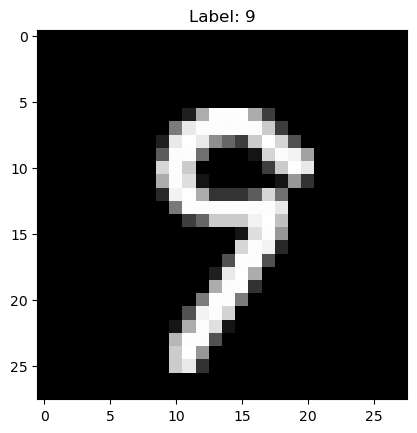

In [5]:
examples = iter(train_loader)
images, labels = next(examples)

plt.imshow(images[0][0], cmap="gray")
plt.title(f"Label: {labels[0]}")
plt.show()

## Creating the model

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Primera capa convolucional
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        # Segunda capa convolucional
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # Capa fully connected
        self.fc1 = nn.Linear(32*7*7, 128)
        self.fc2 = nn.Linear(128, 10)
        # Max pooling
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 + ReLU + Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 + ReLU + Pool
        x = x.view(-1, 32*7*7)               # Flatten
        x = F.relu(self.fc1(x))              # FC1 + ReLU
        x = self.fc2(x)                      # FC2 (salida)
        return x

# Instantiate the model

In [7]:
model = CNN()

# Define loss function

In [8]:
criterion = nn.CrossEntropyLoss()

# Define optimizer

In [9]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model

In [10]:
num_epochs = 5  # Number of times the entire dataset is processed

for epoch in range(num_epochs):
    running_loss = 0.0
    
    for images, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass: compute predictions
        outputs = model(images)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass: compute gradients
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        # Accumulate loss for monitoring
        running_loss += loss.item()
    
    # Print average loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/5], Loss: 0.1937
Epoch [2/5], Loss: 0.0572
Epoch [3/5], Loss: 0.0387
Epoch [4/5], Loss: 0.0293
Epoch [5/5], Loss: 0.0223


# Evaluation metrics

In [11]:
model.eval()

with torch.no_grad():  # We don't need gradients for evaluation
    correct = 0
    total = 0
    
    for images, labels in test_loader:
        outputs = model(images)
        
        # Get predicted class (index of max score)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)         # Number of samples
        correct += (predicted == labels).sum().item()  # Count correct predictions


accuracy = 100 * correct / total
print(f"Accuracy on test set: {accuracy:.2f}%")

Accuracy on test set: 99.02%


## Visualization

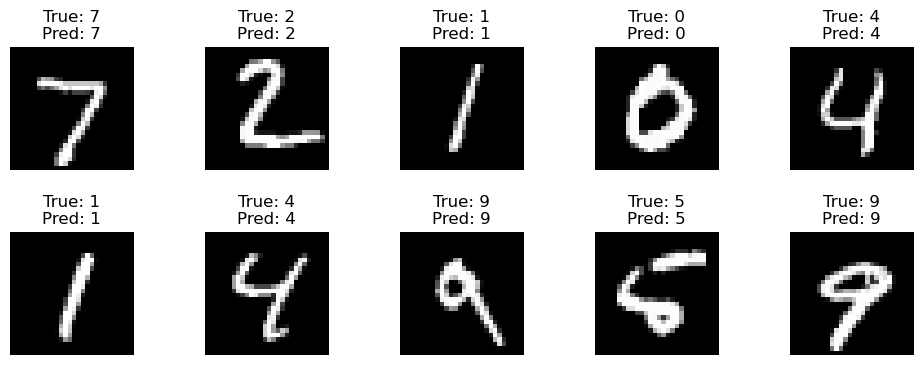

In [13]:
# Switch model to eval mode just in case
model.eval()

# Get a batch of test images
examples = iter(test_loader)
images, labels = next(examples)

# Make predictions
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Plot the first 10 images and their predicted labels
plt.figure(figsize=(12,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"True: {labels[i]}\nPred: {predicted[i]}")
    plt.axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()
